<a id=top-page></a>
# `pykitPIV` demo: Simplified Langevin model

In this Jupyter notebook, we use the simplified Langevin model (SLM) to add stochastic noise to a baseline velocity field.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate random baseline velocity field to advect the particles</a></li>
    <li><a href="#add-SLM">Add the Langevin model atop the baseline velocity field</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

2025-05-15 10:32:33.386669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
n_images = 1
image_size = (200, 200)
size_buffer = 10
origin = 'lower'
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [4]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(1,1),
                     densities=(0.2,0.2),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [10]:
image = Image(random_seed=100)

In [24]:
image.add_particles(particles)

<a id=generate-velocity-field></a>
***

## Generate random baseline velocity field to advect the particles

[Go to the top](#top-page)

In [5]:
mean_flowfield = FlowField(n_images,
                           size=image_size,
                           size_buffer=size_buffer,
                           time_separation=1,
                           random_seed=100)

In [6]:
mean_flowfield.generate_random_velocity_field(gaussian_filters=(4,4),
                                         n_gaussian_filter_iter=10,
                                         displacement=(0,10))

<a id=add-SLM></a>
***

## Add the Langevin model atop the baseline velocity field

[Go to the top](#top-page)

In [7]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      time_separation=1,
                      random_seed=100)

In [8]:
flowfield.generate_langevin_velocity_field(mean_field=mean_flowfield.velocity_field,
                                           integral_time_scale=0.01,
                                           sigma=0.1,
                                           n_stochastic_particles=1000000,
                                           n_iterations=100,
                                           verbose=True)

Generating velocity field for image 0...
	Averaging time: 1.8 minutes.

Total time: 2.0 minutes.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [25]:
image.add_flowfield(flowfield)

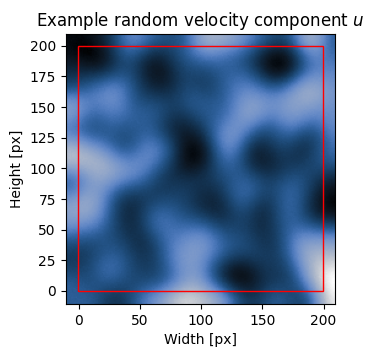

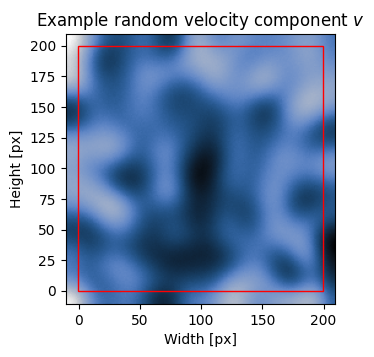

In [26]:
if save_images: filename = 'example-random-velocity-field.png'
image.plot_field(0,
                 with_buffer=True,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                 cmap=cmc.oslo_r,
                 origin=origin,
                 figsize=figsize,
                 filename=filename);

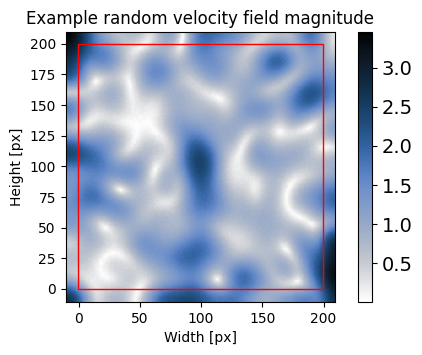

In [27]:
if save_images: filename = 'example-random-velocity-field-magnitude.png'
image.plot_field_magnitude(0,
                           with_buffer=True,
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

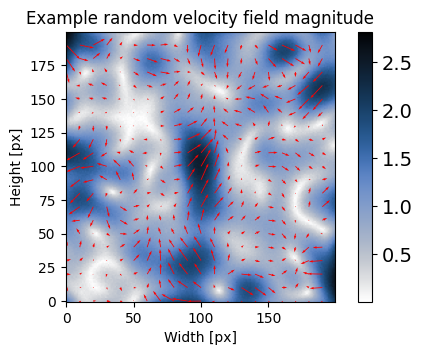

In [28]:
if save_images: filename = 'example-random-velocity-field-magnitude-quiver.png'
image.plot_field_magnitude(0,
                           with_buffer=False,
                           add_quiver=True,
                           quiver_step=10,
                           quiver_color='r',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

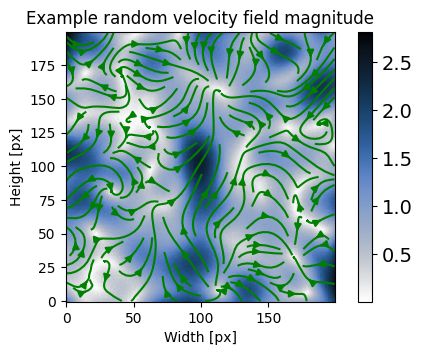

In [29]:
if save_images: filename = 'example-random-velocity-field-magnitude-streamplot.png'
image.plot_field_magnitude(0,
                           with_buffer=False,
                           add_streamplot=True,
                           streamplot_density=1,
                           streamplot_color='g',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [30]:
motion = Motion(particles, 
                flowfield)

In [31]:
motion.runge_kutta_4th(n_steps=10)

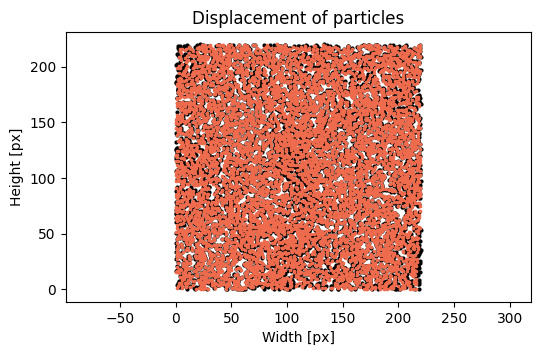

In [32]:
if save_images: filename = 'particle-displacement-RK4.png'
motion.plot_particle_motion(0,
                            s=4,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename=filename);

<a id=add-movement-visualize></a>

### Visualize the PIV image pair

[Go to the top](#top-page)

In [33]:
image.add_motion(motion)

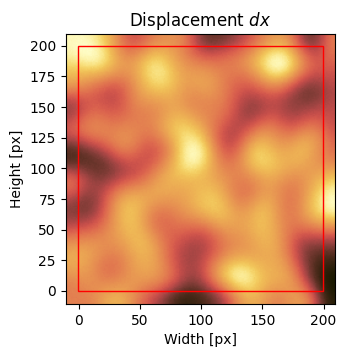

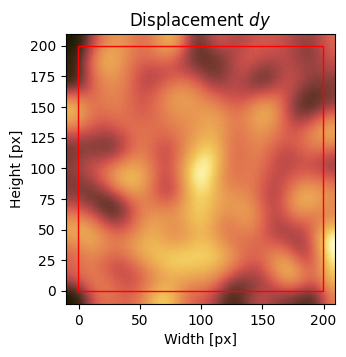

In [34]:
if save_images: filename = 'displacement-field.png'
image.plot_field(0,
                 field='displacement',
                 with_buffer=True,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 title=('Displacement $dx$', 'Displacement $dy$'),
                 cmap=cmc.lajolla,
                 origin=origin,
                 figsize=figsize,
                 filename=filename);

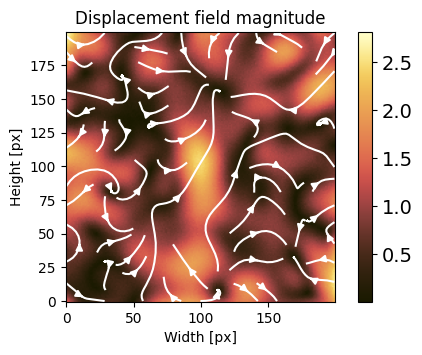

In [35]:
if save_images: filename = 'displacement-field-magnitude.png'
image.plot_field_magnitude(0,
                           field='displacement',
                           with_buffer=False,
                           add_streamplot=True,
                           streamplot_density=0.5,
                           streamplot_color='w',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Displacement field magnitude',
                           cmap=cmc.lajolla,
                           figsize=figsize,
                           filename=filename);

In [36]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

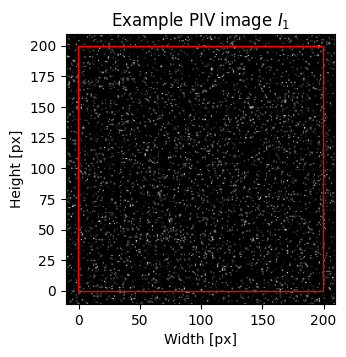

In [37]:
if save_images: filename = 'example-image-I1-with-buffer.png'
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

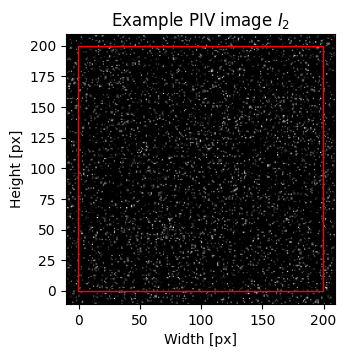

In [38]:
if save_images: filename = 'example-image-I2-with-buffer.png'
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

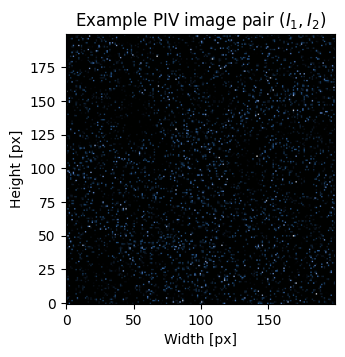

In [39]:
if save_images: filename = 'example-image-I1-I2-no-buffer.png'
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='Example PIV image pair $(I_1, I_2)$',
                      cmap=cmc.oslo,
                      origin=origin,
                      figsize=figsize, 
                      dpi=600,
                      filename=filename);

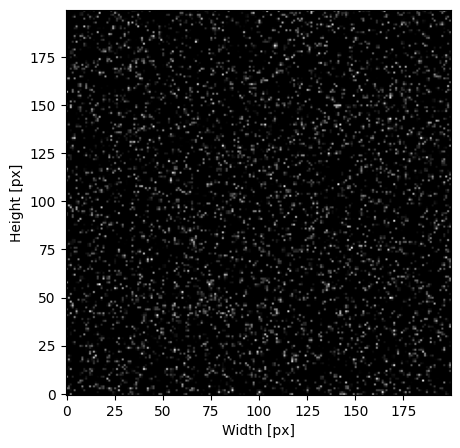

In [41]:
if save_images: filename = 'animated-images.gif'
image.animate_image_pair(0, 
                         with_buffer=False, 
                         xlabel='Width [px]',
                         ylabel='Height [px]',
                         title=None, 
                         cmap='Greys_r', 
                         origin=origin,
                         figsize=(5, 5), 
                         dpi=300, 
                         filename=filename);

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)